In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

#### **Data**

In [2]:
#import the data set
green_statistics = pd.read_csv('original/green_user_stats.csv')

#read the data set
green_statistics.head(1)

,Пользователь,Регион Города,Город Пользователя,Количество Мусора,Тип Мусора,Искатель,Количество Баллов,Дата Завершения
0,test@test.ru,Москва,Армавир,8-12 мешков,Банки,вапрвыапвапвап,10,2024-05-28 18:57:58.259380+00:00


In [3]:
#find the dimensions
green_statistics.shape

(46, 8)

In [4]:
#basic information
green_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Пользователь        46 non-null     object
 1   Регион Города       46 non-null     object
 2   Город Пользователя  46 non-null     object
 3   Количество Мусора   46 non-null     object
 4   Тип Мусора          46 non-null     object
 5   Искатель            46 non-null     object
 6   Количество Баллов   46 non-null     int64 
 7   Дата Завершения     46 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.0+ KB


##### rename the features

In [5]:
#rename the columns
green_statistics = green_statistics.rename(columns={'Пользователь': 'User',
                                                    'Регион Города': 'City_Region',
                                                    'Город Пользователя': 'User_City',
                                                    'Количество Мусора': 'Trash_Amount',
                                                    'Тип Мусора': 'Trash_Type',
                                                    'Искатель': 'Seeker',
                                                    'Количество Баллов': 'Score',
                                                    'Дата Завершения': 'Programme_Completion',                           
})

##### check for duplicates

In [6]:
#check for duplicate values
dupl_columns = list(green_statistics.columns)

mask = green_statistics.duplicated(subset=dupl_columns)
green_stats_duplicates = green_statistics[mask]
print(f'Number of Duplicates: {green_stats_duplicates.shape[0]}')

Number of Duplicates: 0


##### check for null values

In [7]:
#check for null values
green_statistics.isnull().sum()[green_statistics.isnull().sum() > 0]

Series([], dtype: int64)

##### unique values

In [8]:
#find how unique each feature is
print(f"Number of Unique Users: {green_statistics['User'].nunique()}")
print(f"Number of Unique Region: {green_statistics['City_Region'].nunique()}")
print(f"Number of Unique City: {green_statistics['User_City'].nunique()}")
print(f"Number of Unique Trash Amount: {green_statistics['Trash_Amount'].nunique()}")
print(f"Number of Unique Trash Type: {green_statistics['Trash_Type'].nunique()}")
print(f"Number of Unique Seeker: {green_statistics['Seeker'].nunique()}")
print(f"Number of Unique Score: {green_statistics['Score'].nunique()}")
print(f"Number of Unique Programme_Completion: {green_statistics['Programme_Completion'].nunique()}")

Number of Unique Users: 46
Number of Unique Region: 32
Number of Unique City: 33
Number of Unique Trash Amount: 5
Number of Unique Trash Type: 5
Number of Unique Seeker: 41
Number of Unique Score: 3
Number of Unique Programme_Completion: 46


##### trash amount

In [9]:
print(f"Unique Trash Amount: {green_statistics['Trash_Amount'].unique()}")

Unique Trash Amount: ['8-12 мешков' '1-3 мешка' 'более 17 мешков' '4-7 мешков' '13-17 мешков']


need to convert to essentially numbers only

In [10]:
#convert to numerical information only
green_statistics['Trash_Amount'] = green_statistics['Trash_Amount'].apply(lambda x: x.replace(' мешков', '').replace(' мешка', '').replace('более ', '>'))

##### trash type

In [11]:
print(f"Unique Trash Type: {green_statistics['Trash_Type'].unique()}")

Unique Trash Type: ['Банки' 'Окурки' 'Пакеты' 'Бутылки' 'Коробки']


##### score

In [12]:
print(f"Unique Score: {green_statistics['Score'].unique()}")

Unique Score: [10  7  8]


assume the score system: 0-10

##### seeker

In [13]:
green_statistics['Seeker'].unique()

array(['вапрвыапвапвап', 'ТЕСТ', 'тест', 'Детский Памперс ', 'Велосипед',
       'Двери, строительный мусор',
       'В лесу нашли ковёр, под ним был еще один а уже под полосам были пакеты с бутылками',
       'Часть покрытия со спортивной площадки',
       'Окурки везде ((((\nПластики ((((',
       'Были простыни, носки, нижнее бельё ', 'Носки, тряпки',
       'Ничего особенного ', 'Нет',
       'Пластиковые игрушки для детей которые не берут в переработку ,а их все продают в больших количествах ',
       'Каркас от холодильника', 'нет',
       'Часть челюсти какого-то животного 😀',
       'Часть от счётчика для электричества (с вращающимся механизмом цифр)',
       'Не было',
       'Большое количество битого стекла в парке.  Визуально не видно, но если кто-то решит посидеть на травке, то может легко пораниться',
       'Ой,да же не вспомню,много чего выбрасывалив мусор.',
       'Резиновая лодка дырявая', 'Шприцы',
       'Разбитые стеклянные бутылки.', 'веши', 'Носок', 'Книги',
   

##### datetime

In [14]:
#convert to datetime
green_statistics['Programme_Completion'] = pd.to_datetime(green_statistics['Programme_Completion'])

In [15]:
#create new time features - for Programme_Completion
green_statistics['Prog_Comp_Year'] = green_statistics['Programme_Completion'].dt.year
green_statistics['Prog_Comp_Month'] = green_statistics['Programme_Completion'].dt.month
green_statistics['Prog_Comp_Day'] = green_statistics['Programme_Completion'].dt.day

##### data types

In [16]:
#convert the data types
green_statistics['User'] = green_statistics['User'].astype('string')
green_statistics['City_Region'] = green_statistics['City_Region'].astype('string')
green_statistics['User_City'] = green_statistics['User_City'].astype('string')
green_statistics['Trash_Amount'] = green_statistics['Trash_Amount'].astype('string')
green_statistics['Trash_Type'] = green_statistics['Trash_Type'].astype('string')
green_statistics['Seeker'] = green_statistics['Seeker'].astype('string')

green_statistics['Score'] = green_statistics['Score'].to_numpy('int8') 
green_statistics['Prog_Comp_Year'] = green_statistics['Prog_Comp_Year'].to_numpy('int16')
green_statistics['Prog_Comp_Month'] = green_statistics['Prog_Comp_Month'].to_numpy('int8')
green_statistics['Prog_Comp_Day'] = green_statistics['Prog_Comp_Day'].to_numpy('int8')

#### **Visualization**

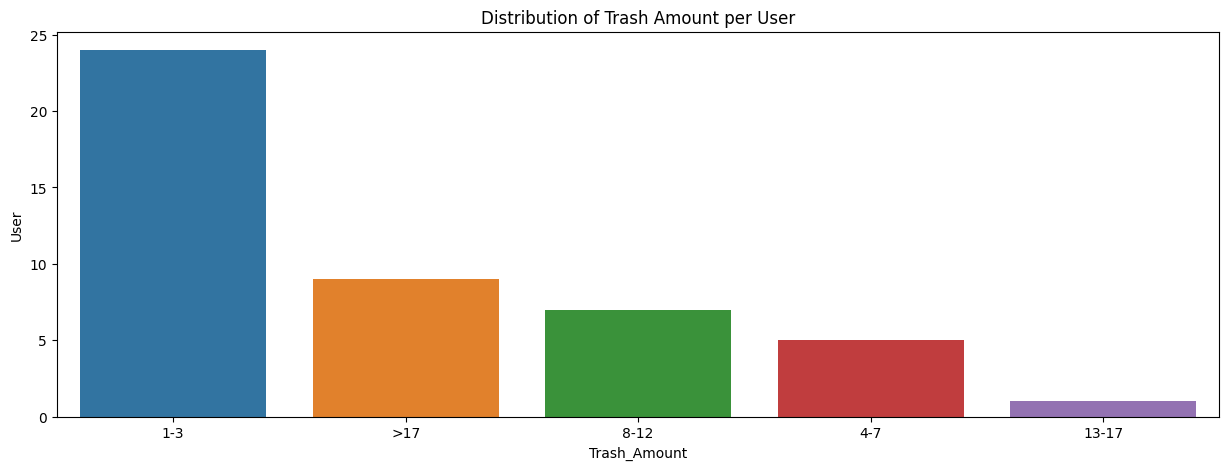

In [17]:
#group by trash amount per user
users_per_trash_amount = green_statistics.groupby('Trash_Amount')['User'].count().sort_values(ascending=False)
users_per_trash_amount = pd.DataFrame(users_per_trash_amount)

#set the canvas
plt.figure(figsize=(15, 5))

ax = sns.barplot(users_per_trash_amount,
                 x='Trash_Amount',
                 y='User',
                 hue='Trash_Amount').set(title='Distribution of Trash Amount per User');

In [18]:
#group by trash type and trash amount
trash_amount_type = green_statistics.groupby(['Trash_Type', 'Trash_Amount']).size().reset_index(name='count')
trash_amount_type = pd.DataFrame(trash_amount_type)
trash_amount_type

,Trash_Type,Trash_Amount,count
0,Банки,8-12,1
1,Банки,>17,1
2,Бутылки,1-3,12
3,Бутылки,4-7,3
4,Бутылки,8-12,4
5,Бутылки,>17,5
6,Коробки,1-3,1
7,Окурки,1-3,6
8,Окурки,4-7,1
9,Окурки,8-12,1


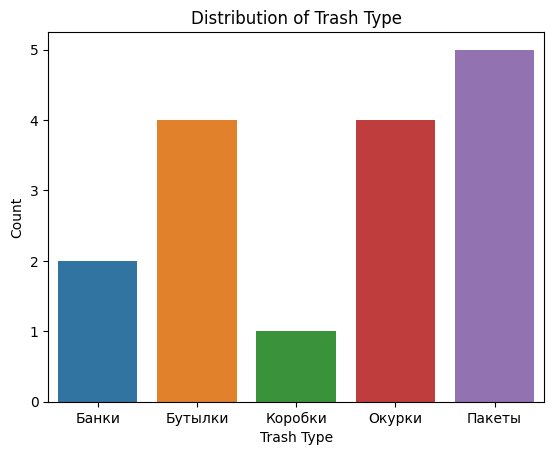

In [19]:
ax = sns.countplot(data=trash_amount_type,
                   x=trash_amount_type['Trash_Type'],
                   hue=trash_amount_type['Trash_Type'])
ax.set(xlabel='Trash Type', ylabel='Count')

plt.title('Distribution of Trash Type')
plt.show()

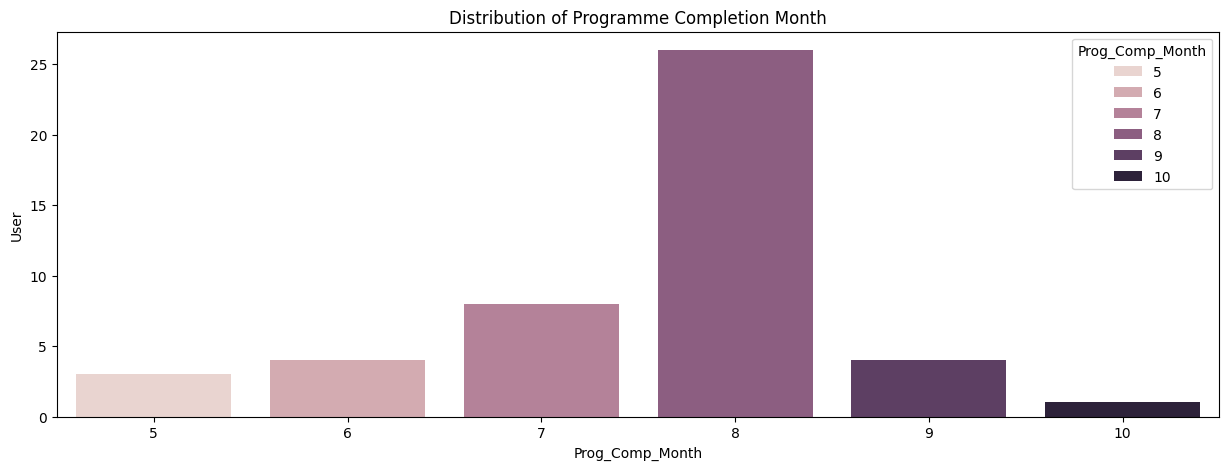

In [20]:
#group month per user
month_by_user = green_statistics.groupby('Prog_Comp_Month')['User'].count()
month_by_user = pd.DataFrame(month_by_user)

#set the canvas
plt.figure(figsize=(15, 5))

ax = sns.barplot(month_by_user,
                 x='Prog_Comp_Month',
                 y='User',
                 hue='Prog_Comp_Month',).set(title='Distribution of Programme Completion Month');

#### **Export**

In [21]:
#remove timezone from columns
green_statistics['Programme_Completion'] = green_statistics['Programme_Completion'].dt.tz_localize(None)

In [22]:
#create a file name
xlx_name = 'user_green_details.xlsx'

#save to excel
green_statistics.to_excel('./adjusted/' + xlx_name,
                          sheet_name='green_statistics')